# Practical 5: Supervised Learning 


Upon completion of this session you should be able to:
- understand data dependency, linear regression and distances.
- be able to apply linear regression in Python.

---
- Materials in this module include resources collected from various open-source online repositories.
- Jupyter source file can be downloaded from https://github.com/gaoshangdeakin/SIT384-Jupyter
- If you found any issue/bug for this document, please submit an issue at [https://github.com/gaoshangdeakin/SIT384/issues](https://github.com/gaoshangdeakin/SIT384/issues)


---



This practical session will demonstrate different coefficient and linear regression.


## Background

### Machine Learning 

### Part 1 Data Dependency

1.1 [Pearson's-r Correlation coefficient](#pearson)

1.2 [Spearman's rank coefficient](#spearman)


### Part 2 Linear Regression

2.1 [Multiple Linear Regression](#mlr)

2.2 [Regression for Median House Price](#rmhp)

### Part 3 Distances

3.1 [Euclidean Distance](#euclidean)

3.2 [Cosine Distance](#cosine)

3.3 [Term-by-Document Matrix](#t2d)


## Tasks

## Summary

---

## <span style="color:#0b486b">Machine Learning</span>

<a id = "machinelearning"></a>

Machine learning (ML) is "Machines imitating and adapting human like behavior". In other words, we try to teach machines to “Learn from Experience”.

Machine learning algorithms use computational methods to “learn” information directly from data without relying on a predetermined equation as a model. The algorithms adaptively improve their performance as the number of samples available for learning increases. The ML-Algorithms find natural patterns within the data, get insights and predict the unknown for better decisions.

There are basically two types of ML Techniques:

   1. Supervised Learning
   2. Unsupervised Learning

###Supervised Learning:

Finds patterns (and develops predictive models) using both, input data and output data. All Supervised Learning techniques area form of either Classification or Regression.

* Classification: used for predicting discrete responses.E.g. Whether India will WIN or LOSE a Cricket match? Whether an email is SPAM or GENUINE? WIN, LOSE, SPAM, GENUINE are the predefined classes. And output has to fall among these depending on the input.
* Regression: used for predicting continuous responses.E.g. Trend in stock market prices, Weather forecast, etc.

###Unsupervised Learning:

Finds patterns based only on input data. This technique is useful when you’re not quite sure what to look for. Often used for exploratory Analysis of raw data. Most Unsupervised Learning techniques are a form of Cluster Analysis.

* Cluster Analysis: you group data items that have some measure of similarity based on characteristic values. At the end what you will have is a set of different groups (Let’s assume A — Z such groups). A Data Item(d1) in one group(A) is very much similar to other Data Items(d2 — dx) in the same group(A), but d1 is significantly different from Data Items belonging to different groups (B — Z).

SciPy and Scikit-Learn will be used in machine learning. For a quick review, go [.html version](practical5-review.html) or [.ipynb version](https://github.com/gaoshangdeakin/SIT384-Jupyter/blob/master/practical5-review.ipynb).  

Before introducing regression, let's talk about data dependency first. 

---
## <span style="color:#0b486b">1. Data Dependency</span>

<a id = "pearson"></a>


### <span style="color:#0b486b">1.1 Pearson's-r Correlation coefficient</span>

The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. The symbol for Pearson's correlation is "ρ" when it is measured in the population and "r" when it is measured in a sample. More detail can be found [statistics.laerd.com](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) or [wikipedia.org](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

We assume $X=\left\{ X_{1},\ldots,X_{n}\right\}$ 
and $Y=\left\{ Y_{1},\ldots,Y_{n}\right\}$. Then Pearson-r correlation coefficient is defined as 

$$ \rho(X,Y) = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} =  \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2} \sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}} $$

Use the car data and find the Pearson's-r correlation coefficient between car weights and fuel consumption.

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

%matplotlib inline

In [2]:
#No need to use wget if you've retrieved file from clouddeakin.
!pip install wget

In [3]:
import wget

link_to_data = 'https://raw.githubusercontent.com/gaoshangdeakin/SIT384/master/Auto.csv'
DataSet = wget.download(link_to_data)

100% [................................................................................] 1167 / 1167

In [4]:
data = pd.read_csv('Auto.csv')

In [5]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


In [6]:
data.describe()

,miles,cylinder number,Engine displacement,Horse power,Weight
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,6.187500,230.721875,146.687500,3.217250
std,6.026948,1.785922,123.938694,68.562868,0.978457
min,10.400000,4.000000,71.100000,52.000000,1.513000
25%,15.425000,4.000000,120.825000,96.500000,2.581250
50%,19.200000,6.000000,196.300000,123.000000,3.325000
75%,22.800000,8.000000,326.000000,180.000000,3.610000
max,33.900000,8.000000,472.000000,335.000000,5.424000


In [7]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


In [8]:
miles = data['miles']
weights = data['Weight']

In [9]:
print("miles[:10]:", miles[:10])
print("weights[:10]:", weights[:10])

miles[:10]: 0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
5    18.1
6    14.3
7    24.4
8    22.8
9    19.2
Name: miles, dtype: float64
weights[:10]: 0    2.620
1    2.875
2    2.320
3    3.215
4    3.440
5    3.460
6    3.570
7    3.190
8    3.150
9    3.440
Name: Weight, dtype: float64


In [10]:
pearson_r = np.cov(miles, weights)[0, 1] / (miles.std() * weights.std())
print("pearson_r:", pearson_r)

pearson_r: -0.8676593765172278


In [11]:
np.corrcoef(miles,weights)

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

In [12]:
horse = data['Horse power']

In [13]:
np.corrcoef(weights,horse)

array([[1.        , 0.65874789],
       [0.65874789, 1.        ]])

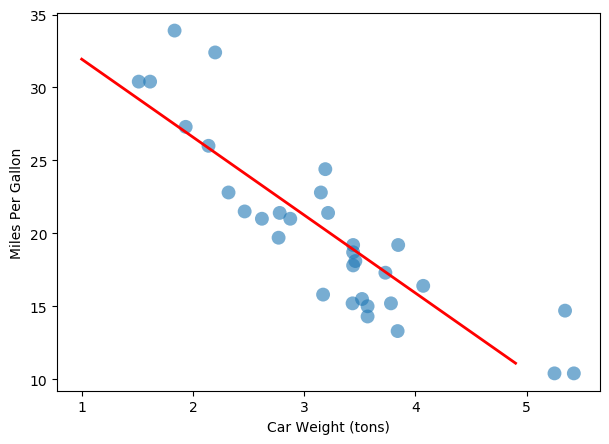

In [14]:
# plotting
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

#s: marker size; color: marker color; alpha: marker opacity.
#e.g. ax.scatter(x, y, s=10)
#https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.10-Scatter-Plots/
ax.scatter(weights,miles, alpha=0.6, edgecolor='none', s=100)
ax.set_xlabel('Car Weight (tons)')
ax.set_ylabel('Miles Per Gallon')

#numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
#Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
#Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
line_coef = np.polyfit(weights, miles, 1)
xx = np.arange(1, 5, 0.1)
yy = line_coef[0]*xx + line_coef[1]

ax.plot(xx, yy, 'r', lw=2)

**Exercise 1**: 

1. Find the Pearson's-r coefficient for two linearly dependent variables. Add some noise and see the effect of varying the noise. 
2. Simulate and visualize some data with positive linear correlation
3. Simulate and visualize some data with negative linear correlation. 

(0.8712665124461638, 4.712293243757288e-32)


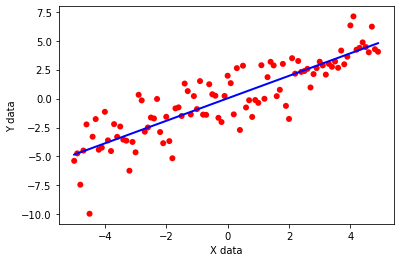

In [15]:
xx = np.arange(-5, 5, 0.1)
pp = 1.5  # level of noise
yy = xx + np.random.normal(0, pp, size=len(xx))

# visualize the data
#plt.subplots() Plt.subplots(nrows, ncols) 
#The function returns a figure object and a tuple containing axes objects equal to nrows*ncols. 
#Each axes object is accessible by its index. 
fig, ax = plt.subplots()
ax.scatter(xx, yy, c='r', edgecolor='none')
ax.set_xlabel('X data')
ax.set_ylabel('Y data')

line_coef = np.polyfit(xx, yy, 1)
line_xx = np.arange(-5, 5, 0.1)
line_yy = line_coef[0]*line_xx + line_coef[1]

#https://stackoverflow.com/questions/43482191/matplotlib-axes-plot-vs-pyplot-plot
#plt.plot() can also be used
#ax.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html
ax.plot(line_xx, line_yy, 'b', lw=2)

print (scipy.stats.pearsonr(xx, yy))

Pearson's r coefficient is limited to analyze the linear correlation between two variables. It is not capable to show the non-linear dependency. Investigate the Pearson's r coefficient between two variables that are correlated non-linearly.

Text(0.5, 1.0, '$Y = X^2+\\epsilon$')

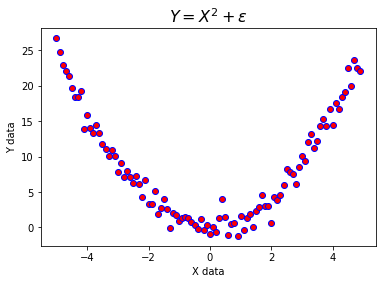

In [16]:
# generate some data, first for X
xx = np.arange(-5, 5, 0.1)

# assume Y = 2Y + some perturbation
pp = 1.1  # level of noise
yy = xx**2 + np.random.normal(0, pp, size=len(xx))

# visualize the data
fig, ax = plt.subplots()
ax.scatter(xx, yy, c='r', edgecolor='b')
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_title('$Y = X^2+\epsilon$', size=16)

The Pearson's-r correlation is near zero which means there is no linear correlation. But how about non-linear correlation? Isn't $y=x^2$?

In [17]:
np.corrcoef(xx,yy)

array([[ 1.       , -0.0348772],
       [-0.0348772,  1.       ]])

<a id = "spearman"></a>


### <span style="color:#0b486b">1.2 Spearman's rank coefficient</span>

Spearman's rank coefficient is used for discrete/ordinal data. Find the Spearman's rank between horse power and number of cylinders of the car data.

In [18]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


SpearmanrResult(correlation=0.9017909351708425, pvalue=1.8676856258444694e-12)


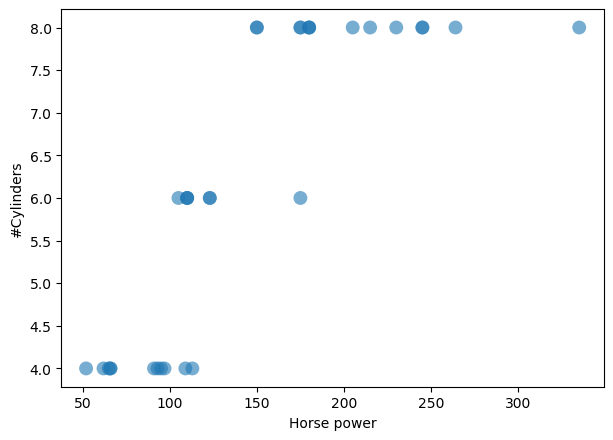

In [19]:
#horse = np.array([float(dd[4]) for dd in data[1:]])
#cylinder = np.array([float(dd[2]) for dd in data[1:]])
horse = data['Horse power']
cylinder = data['cylinder number']


fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

#s: marker size; color: marker color; alpha: marker opacity.
#e.g. ax.scatter(x, y, s=10)
#https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.10-Scatter-Plots/
ax.scatter(horse, cylinder, alpha=0.6, edgecolor='none', s=100)
ax.set_xlabel('Horse power')
ax.set_ylabel('#Cylinders')

print (scipy.stats.spearmanr(horse, cylinder))

**Exercise 2**. 
Compute the spearman rank correlation between "Horse power" and "Engine displacement"

SpearmanrResult(correlation=0.8510426269929073, pvalue=6.791337587146898e-10)
[[1.         0.79094859]
 [0.79094859 1.        ]]


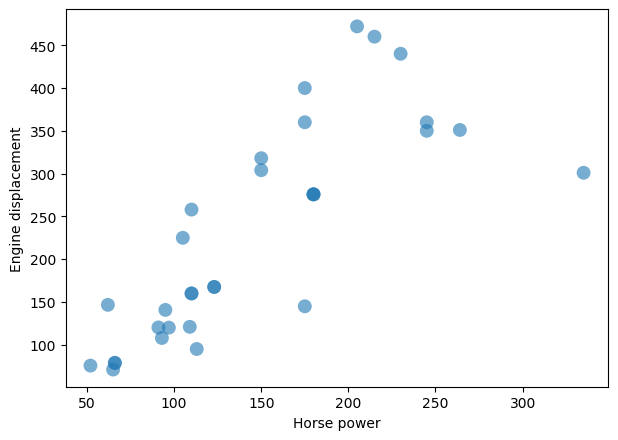

In [20]:
horse = data['Horse power']
engine = data['Engine displacement']


fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(horse, engine, alpha=0.6, edgecolor='none', s=100)
ax.set_xlabel('Horse power')
ax.set_ylabel('Engine displacement')

print (scipy.stats.spearmanr(horse, engine))

#print(np.corrcoef(horse, engine))

---
## <span style="color:#0b486b">2. Linear Regression</span>


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

First we investigate a simple case by fitting a linear regression for three data points. First we simulate the data:

In [22]:
# simulating the data

#numpy.c_ Translates slice objects to concatenation along the second axis. This is short-hand for np.
#np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
#output: array([[1, 2, 3, 0, 0, 4, 5, 6]])
#https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly
x = np.c_[0, 1, 2, 1.5].T
y  = [1, 1.5, 3.1, 1.5]

print ("x:",x)
print ("y:",y)

x: [[0. ]
 [1. ]
 [2. ]
 [1.5]]
y: [1, 1.5, 3.1, 1.5]


Text(0, 0.5, 'y')

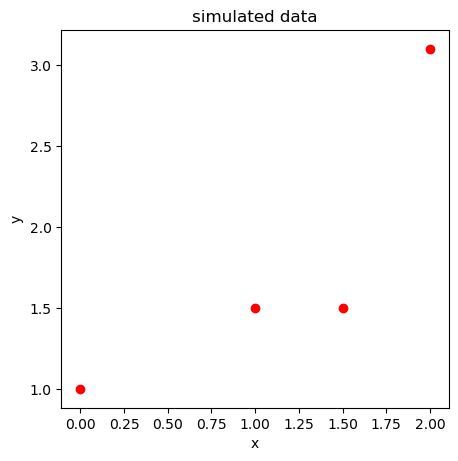

In [23]:
#plotting the data

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(x, y, c='r')
ax.set_title('simulated data')
ax.set_xlabel('x')
ax.set_ylabel('y')

Now we fit the linear regression:

In [24]:
from sklearn import linear_model

# instanciate the model
lr = linear_model.LinearRegression()

# fit the model
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print ("Coefficients:", lr.coef_)
print ("   Intercept:", lr.intercept_)
# print ("    Residues:", lr.residues_)

Coefficients: [0.89714286]
   Intercept: 0.7657142857142858


Let's plot the line to see how it estimates our data:

Text(0, 0.5, 'y')

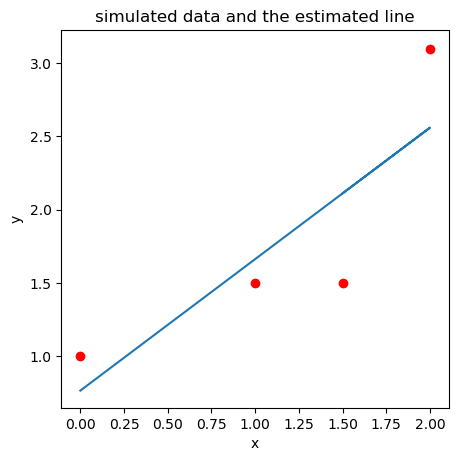

In [26]:
yhat = lr.predict(x)

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(x, y, c='r')
ax.plot(x, yhat)

ax.set_title('simulated data and the estimated line')
ax.set_xlabel('x')
ax.set_ylabel('y')

We can use the method `predict()` to predict `y` for a new `x`

In [27]:
x_test = np.c_[4, 2.3].T
y_test = lr.predict(x_test)

print ("x_test.T:", x_test.T)
print ("y_test:", y_test)

x_test.T: [[4.  2.3]]
y_test: [4.35428571 2.82914286]


<a id = "mlr"></a>


### <span style="color:#0b486b">2.1 Multiple Linear Regression</span>


Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y. For example if we have two explanatory variables (attributes, features), our data has such a form:

$$
D=\left\{ \left(\left(x_{1,1},x_{2,1}\right),y_{1}\right),\left(\left(x_{1,2},x_{2,2}\right),y_{2}\right),\ldots,\left(\left(x_{1,n},x_{2,n}\right),y_{n}\right)\right\} 
$$

Now we fit a multiple linear regression $y = x_1 + 2x_2 + 1$


In [28]:
# simulate the data

x = np.c_[[0, 0], [0, 1], [1, 1], [1, 0]].T
y = [1.5, 3.2, 4, 2]

print (x)
print (y)

[[0 0]
 [0 1]
 [1 1]
 [1 0]]
[1.5, 3.2, 4, 2]


In [29]:
mlr = linear_model.LinearRegression(fit_intercept=True)
mlr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print ("mlr.coef_:", mlr.coef_)
print ("mlr.intercept_:", mlr.intercept_)

mlr.coef_: [0.65 1.85]
mlr.intercept_: 1.425


In [31]:
print ("mlr.predict(x):", mlr.predict(x))

mlr.predict(x): [1.425 3.275 3.925 2.075]


**Exercises 3**: 

As the score suggests, now we have the perfect regression. Change the values of $y$ slightly and see what effect it has on the `mlr`.

<a id = "rmhp"></a>


### <span style="color:#0b486b">2.2 Regression for median house prices</span>


We are going to use the package `pandas` for reading and storing the data.

In [32]:
#No need to use wget if you've retrieved file from clouddeakin.
wget.download('https://raw.githubusercontent.com/gaoshangdeakin/SIT384/master/housing_300.csv')

data = pd.read_csv('housing_300.csv')

100% [..............................................................................] 20865 / 20865

In [33]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.435446,15.386667,8.873600,0.09000,0.514333,6.420333,62.796667,4.279012,4.486667,312.043333,17.588333,378.708600,10.704167,25.484667
std,0.670445,25.968217,6.378924,0.28666,0.108867,0.706043,29.141200,1.980475,1.618194,69.105717,2.286012,43.328929,6.208806,8.887553
min,0.006320,0.000000,0.460000,0.00000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.068810,0.000000,4.050000,0.00000,0.437000,5.934500,36.600000,2.597450,4.000000,264.000000,15.600000,381.075000,5.907500,19.575000
50%,0.139950,0.000000,6.660000,0.00000,0.489000,6.249500,66.800000,3.945400,4.000000,307.000000,17.800000,392.215000,9.530000,23.100000
75%,0.522168,21.250000,10.590000,0.00000,0.547000,6.781250,91.350000,5.720900,5.000000,384.000000,19.100000,395.622500,14.112500,29.650000
max,4.097400,100.000000,25.650000,1.00000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


Plot the scatter plot of the number of rooms vs the median house prices.

Text(0, 0.5, '$Y$ (median house prices)')

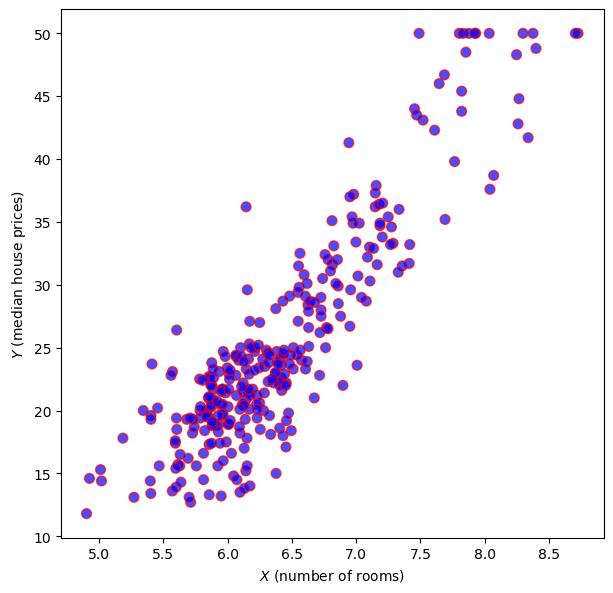

In [35]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
median_prices = data['MEDV']
avg_rooms = data['RM']
#ones() function returns a new array of given shape and data type, where the element's value is set to 1.
#https://www.geeksforgeeks.org/numpy-ones-python/ 
scales = 50*np.ones(len(median_prices))
ax.scatter(avg_rooms, median_prices, color='b',s=scales, alpha=0.7, edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')

In [36]:
print ("avg_rooms.shape:", avg_rooms.shape)
print ("median_prices.shape:", median_prices.shape)

avg_rooms.shape: (300,)
median_prices.shape: (300,)


How correlated are the number of rooms and the price of the house?

In [37]:
np.corrcoef(avg_rooms, median_prices)

array([[1.        , 0.89804265],
       [0.89804265, 1.        ]])

Now we want to fit a linear regression mode on the data.

In [38]:
# prepare the data

x = np.c_[avg_rooms.values]
y = median_prices.tolist()

In [39]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [40]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print (lr.coef_)
print (lr.intercept_)
# print lr.residues_

[11.30440747]
-47.09339739688137


In [42]:
# obtain the model parameters

print (lr.coef_, lr.intercept_)

[11.30440747] -47.09339739688137


In [43]:
# predict 

yhat = lr.predict(x)

In [44]:
print ("x[:10]:", x[:10])
print ("yhat[:10]:", yhat[:10])

x[:10]: [[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]]
yhat[:10]: [27.23308169 25.49220294 34.12877024 32.01484605 33.69920276 25.59394261
 20.86870028 22.67740548 16.56172104 20.77826503]


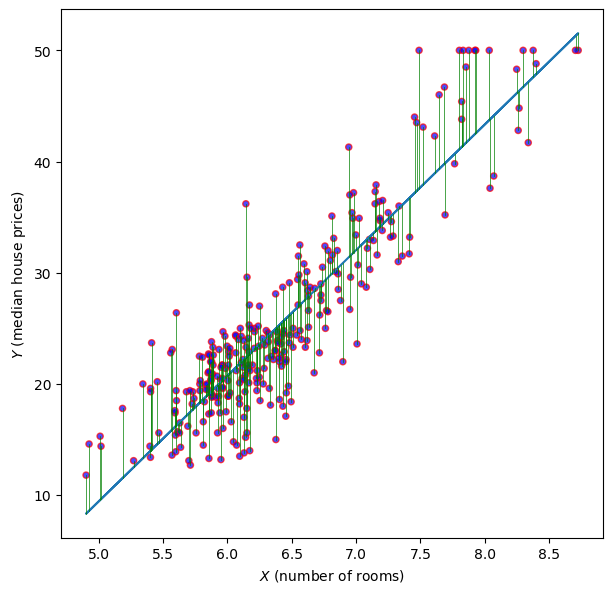

In [76]:
#plot the result

fig,ax = plt.subplots(figsize=(7,7),dpi=100)

scales = 20*np.ones(len(median_prices))

#s: marker size; color: marker color; alpha: marker opacity.
#e.g. ax.scatter(x, y, s=10)
#https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.10-Scatter-Plots/
ax.scatter(avg_rooms,median_prices,color='b',s=scales,alpha=0.7,edgecolor='r')

#ax set methods can also be used
#ax.set_title('xxxx')
#ax.set_xlabel('$X$ (number of rooms)')
#ax.set_ylabel('$Y$ (median house prices)')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')

# plot the regression linear leared
ax.plot(x,yhat)
#ax.scatter(x,yhat,color='r',s=scales,alpha=0.7,edgecolor='g') #scatter the x and predicted y

# visualize the residuals

#reshape() function is used to give a new shape to an array without changing its data.
#numpy.reshape(arr, new_shape, order)
#useful links: 
#https://www.w3resource.com/numpy/manipulation/reshape.php
#https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape 
tmp = np.reshape(x,[1,len(x)])[0] #get all the x coordinate
tmp_x = []
tmp_y = []
for i in range(len(x)): #for each x
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate
    tmp_y = np.append(tmp_y,y[i]) #get y coordinate
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate again
    tmp_y = np.append(tmp_y,yhat[i]) #get predicted y coordinate
    ax.plot(tmp_x,tmp_y,color='g',linewidth=0.5) #draw vertical residual line using (x,y) and (x,predicted y)
    tmp_x = []
    tmp_y = []

In [75]:
#sum of residual
#lr.residues_

It is customary to test your model on **unseen** data. So we divide our data into two parts. We use 70% of it to train the model and 30% to evaluate its performance on unseen data.

In [47]:
split = 0.7
split_idx = int(np.round(split * len(data)))
split_idx

210

In [48]:
train_data = data[0:200]
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


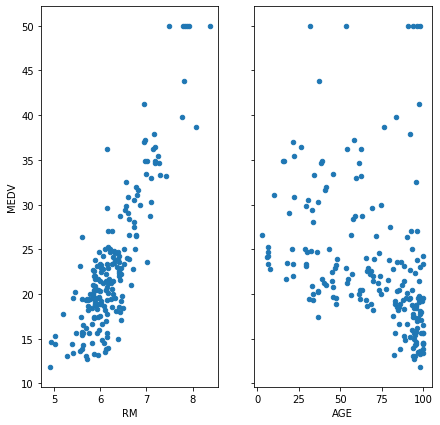

In [49]:
fig, axs = plt.subplots(1, 2, sharey=True)
train_data.plot(kind='scatter', x='RM', y='MEDV', ax=axs[0], figsize=(7, 7))
train_data.plot(kind='scatter', x='AGE', y='MEDV', ax=axs[1], figsize=(7, 7))

In [50]:
test_data = data[200:300]
test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
201,0.03445,82.5,2.03,0,0.4150,6.162,38.4,6.2700,2,348,14.7,393.77,7.43,24.1
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0


In [51]:
train_X = train_data['RM'].values
train_X = np.c_[train_X]
train_Y = train_data['MEDV'].tolist()

test_X = test_data['RM'].values
test_X = np.c_[test_X]
test_Y = test_data['MEDV'].tolist()

In [52]:
print (type(train_X))
print (train_X.shape)
print (type(train_Y))

<class 'numpy.ndarray'>
(200, 1)
<class 'list'>


In [53]:
'''
Build a linear regression model from training data
'''
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print (lr.coef_)
print (lr.intercept_)

[11.48585853]
-48.553067034025624


Now we plot the linear regression result and the data to see how it fits the training data:

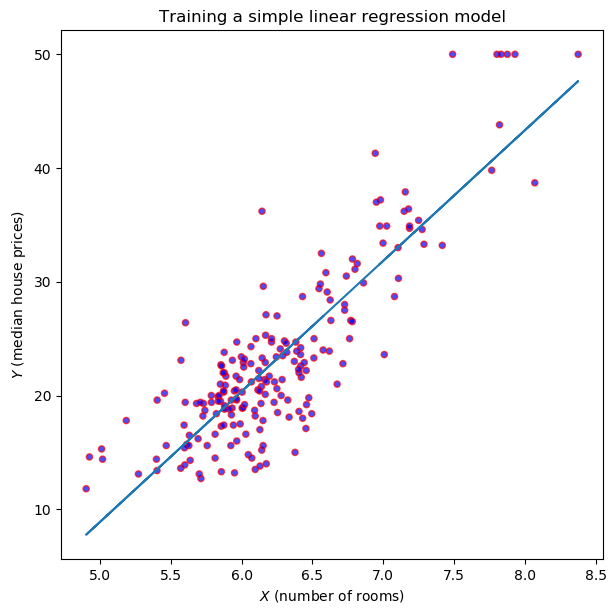

In [55]:
fig,ax = plt.subplots(figsize=(7,7),dpi=100)

# plot training data
scales = 20*np.ones(len(train_Y))
ax.scatter(train_X,train_Y,color='b',s=scales,alpha=0.7,edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')
plt.title('Training a simple linear regression model')

# plot the regression line
train_Yhat = lr.predict(train_X)
plt.plot(train_X,train_Yhat)

Now that we have obtained the model parameters, we can use the model to predict for unseen data:

In [56]:
yhat_test = lr.predict(test_X)

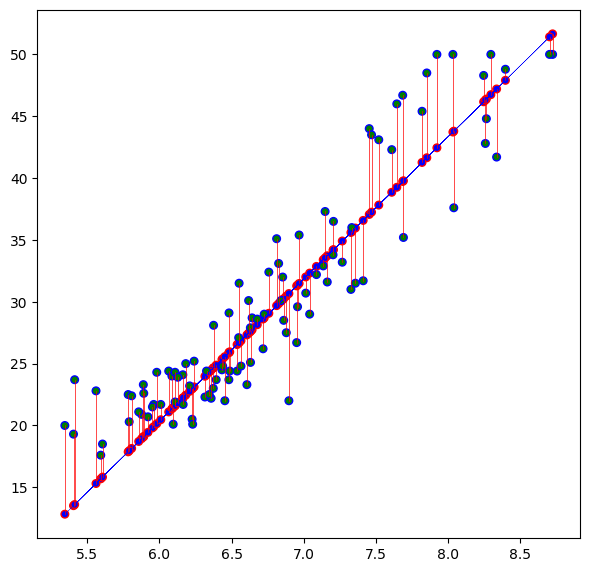

In [79]:
fig,ax = plt.subplots(figsize=(7,7),dpi=100)

# plot the predicted points along the prediction line
scales = 30*np.ones(len(test_X))
ax.scatter(test_X,yhat_test,s=scales,color='b',edgecolor='r') #predicted points
ax.plot(test_X,yhat_test,color='b',linewidth=.2) #prediction line

# plot the true values
scales = 30*np.ones(len(test_X))
ax.scatter(test_X,test_Y,s=scales,color='g',edgecolor='b') #test y: true value

# plot the residual line
# get all the x coordinate (test_X) from the test dataset
tmp = np.reshape(test_X,[1,len(test_X)])[0]

#the following print statements are for better understanding
#print("test_X", test_X)
#print("np.reshape(test_X,[1,len(test_X)])", np.reshape(test_X,[1,len(test_X)]))
#print("tmp:",tmp)

tmp_x = []
tmp_y = []
for i in range(len(test_X)): #for each x in test set
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate
    tmp_y = np.append(tmp_y,yhat_test[i]) #get predicted y coordinate
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate again
    tmp_y = np.append(tmp_y,test_Y[i]) #get test y coordinate
    ax.plot(tmp_x,tmp_y,color='red',linewidth=0.5) #draw the vertical residual line (x,yhat), (x,test_y)
    tmp_x = []
    tmp_y = []

In [58]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
## <span style="color:#0b486b">3. Distances</span>

`Distance` is a numerical description of how far apart objects are. It is a concrete way of describing what it means for elements of some space to be close or far away from each other, for example the distance between two vectors in an 2-dimensional space.

Now that you have know how to represent an n-dimensional vector in Python with NumPy arrays, we will write a function as a metric to measure the distance between two vectors. There are multiple ways to measure the distance between two vectors. We will discuss Euclidean distance and cosine distance.

<a id = "euclidean"></a>


### <span style="color:#0b486b">3.1 Euclidean Distance</span>

Euclidean distance comes from Geometry. If we assume $\mathbf{x}_{1}=\left[x_{11},x_{12},\ldots,x_{1n}\right]$ and $\mathbf{x}_{2}=\left[x_{21},x_{22},\ldots,x_{2n}\right]$, then the Euclidean distance between $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$ is defined as:

$$d\left(\mathbf{x}_{1},\mathbf{x}_{2}\right)=\sqrt{\left(x_{11}-x_{21}\right)^{2}+\left(x_{12}-x_{22}\right)^{2}+\ldots+\left(x_{1n}-x_{2n}\right)^{2}}
$$

We can use array operators for this task.

In [59]:
x1 = np.array([2, 5, 4, 6, 8])
x2 = np.array([3, 5, 6, 8, 6])

print (x1 - x2)
print ((x1 - x2) ** 2)
print (np.sqrt(np.sum((x1 - x2) ** 2)))

[-1  0 -2 -2  2]
[1 0 4 4 4]
3.605551275463989


In [60]:
import numpy as np

In [61]:
def euclidean_distance1(x1, x2):
    d = x1 - x2
    d = d ** 2
    return np.sqrt(d.sum())

In [62]:
x1 = np.array([-1, 2, 0, 5])
x2 = np.array([4, 2, 1, 0])

print (euclidean_distance1(x1, x2))

7.14142842854285


Since two vectors passed to the function should be the same size, it is better to perform a sanity check before applying the subtraction. Otherwise it will raise an error. We can do this by using `if - elif` statement or as a better practice by using `try - except`.

In [63]:
import sys

def euclidean_distance2(x1, x2):
    if x1.shape[0] != x2.shape[0]:
        sys.exit('x1 and x2 are not the same size')
    else:
        d = x1 - x2
        d = d ** 2
        return np.sqrt(d.sum())

In [64]:
# fix this cell

x1 = np.array([-1, 2, 0, 5, 9])
x2 = np.array([4, 2, 1, 0, 1])
euclidean_distance2(x1, x2)

10.723805294763608

In [65]:
def euclidean_distance3(x1, x2):
    try:
        d = x1 - x2
        d = np.power(d, 2)
        return np.sqrt(d.sum())
    except ValueError as e:
        print ("Vectors passed to the function are not the same size")
        # you can return a default value
        return None

In [66]:
# fix this cell

x1 = np.array([-1, 2, 0, 5, 9])
x2 = np.array([4, 2, 1, 2])
a = euclidean_distance3(x1, x2)

Vectors passed to the function are not the same size


In [67]:
def euclidean_distance4(x1, x2):
    try:
        d = np.array(x1) - np.array(x2)
        d = np.power(d, 2)
        return np.sqrt(d.sum())
    except ValueError as e:
        print ("Vectors passed to the function are not the same size")
        # you can return a default value
        return None

<a id = "cosine"></a>

### <span style="color:#0b486b">3.2 cosine similarity and distance</span>

Cosine similarity is a measure of similarity between two vectors based on the angle between them. Cosine similarity is widely used in information retrieval and text mining as a measure of similarity between documents and is defined as:

$$S_{c}\left(\mathbf{x}_{1},\mathbf{x_{2}}\right)=\frac{\mathbf{x}_{1}.\mathbf{x_{2}}}{\parallel\mathbf{x}_{1}\parallel^{2}+\parallel\mathbf{x}_{2}\parallel^{2}-\mathbf{x}_{1}.\mathbf{x_{2}}}$$


Cosine similarity is particularly used in positive space where the outcome is bounded in [0, 1]. The cosine distance is defined as the complement to cosine similarity in positive space that is $D_{c}\left(x_{1},x_{2}\right)=1-S_{c}\left(x_1,x_2\right)$ where $D_c$ is the cosine distance and $S_c$ is the cosine similarity.

In [68]:
x1 = np.array([1,2,3])
x2 = np.array([3,4,6])

print(x1 * x1)

[1 4 9]


In [69]:
def cosine_distance(x1, x2):
    try:
        num = (x1*x2).sum()
        denom = (x1*x1).sum() + (x2*x2).sum() - (x1*x2).sum()
        num += 0.0    # or use np.astype(float) to make sure of float division
        return 1 - num/denom
    except ValueError as e:
        print ("Vectors passed to the function are not the same size")
        return None
    

In [70]:
x1 = np.array([2, 0, 5, 9])
x2 = np.array([4, 2, 1, 0])
cosine_distance(x1, x2)

0.8898305084745762

# <span style="color:#0b486b">Tasks</span>

Try the provided examples and get yourself familiar with sample plot code before attempting portolio tasks.

Please show your attempt to your tutor before you leave the lab, or email your files to your coordinator if you are an off-campus student.

# <span style="color:#0b486b">Summary</span>

In this session we have covered: 
 - data dependency, linear regression and distances.
 - how to apply linear regression in Python.

Reference:
1. Yash Soni, "Machine Learning for dummies — explained in 3 mins!", https://becominghuman.ai/machine-learning-for-dummies-explained-in-2-mins-e83fbc55ac6d, accessed 31/03/2019.